<a href="https://colab.research.google.com/github/jonkrohn/tf2/blob/master/shallow_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network in TensorFlow 2.0

A shallow neural network that classifies MNIST digits.

_Remember to change your Runtime to GPU or TPU._

#### Load dependencies

In [0]:
import tensorflow as tf

In [2]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.0.5
tensorflow==1.14.0rc1
tensorflow-estimator==1.14.0rc1
tensorflow-hub==0.4.0
tensorflow-metadata==0.13.0
tensorflow-probability==0.7.0rc0


In [3]:
pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 82kB/s 
     |████████████████████████████████| 501kB 23.4MB/s 
     |████████████████████████████████| 3.1MB 40.1MB/s 
  Found existing installation: tensorflow 1.14.0rc1
    Uninstalling tensorflow-1.14.0rc1:
      Successfully uninstalled tensorflow-1.14.0rc1


In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.0.5
tensorflow==2.0.0b0
tensorflow-estimator==1.14.0rc1
tensorflow-hub==0.4.0
tensorflow-metadata==0.13.0
tensorflow-probability==0.7.0rc0


#### Load data

In [0]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

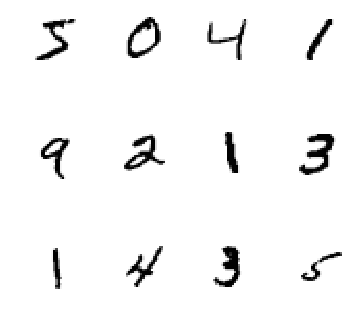

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_valid.shape

(10000, 28, 28)

In [9]:
y_valid.shape

(10000,)

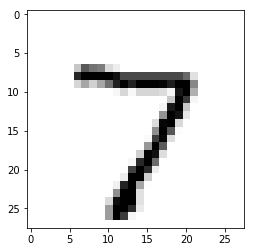

In [10]:
plt.imshow(X_valid[0], cmap="Greys")

In [11]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_valid[0]

7

#### Preprocess data

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [15]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [17]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [0]:
model = keras.models.Sequential([
    
    keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
    
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
64*784

50176

In [21]:
(64*784)+64

50240

In [22]:
(10*64)+10

650

#### Configure model

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#### Train!

In [25]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0930 - accuracy: 0.0651 - val_loss: 0.0926 - val_accuracy: 0.0558
Epoch 2/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0922 - accuracy: 0.0657 - val_loss: 0.0920 - val_accuracy: 0.0651
Epoch 3/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0917 - accuracy: 0.0794 - val_loss: 0.0916 - val_accuracy: 0.0784
Epoch 4/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0913 - accuracy: 0.0948 - val_loss: 0.0912 - val_accuracy: 0.0942
Epoch 5/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0909 - accuracy: 0.1144 - val_loss: 0.0908 - val_accuracy: 0.1189
Epoch 6/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0905 - accuracy: 0.1399 - val_loss: 0.0904 - val_accuracy: 0.1495
Epoch 7/200
60000/60000 [=========================